In [120]:
import numpy as np
import cv2
import pandas as pd
import os
from tqdm import tqdm
trim_csv =r"C:\Users\jingy\Parkinson\Codes\data_trim.csv"
df= pd.read_csv(trim_csv)

In [121]:
df

,Video_Path,Time,ON or OFF,R1 or R2,Halfway or Wholeway,FW_Start,FW_End,BW_Start,BW_End,Video Condition
0,"""C:\Users\jingy\Parkinson\NIHFX695VBHFM\Baseli...",Baseline,OFF,R1,Whole,12.00,18.44,20.68,25.08,NaN
1,"""C:\Users\jingy\Parkinson\NIHFX695VBHFM\Baseli...",Baseline,OFF,R2,Whole,168.64,180.00,189.52,199.08,NaN
2,"""C:\Users\jingy\Parkinson\NIHFX695VBHFM\Month ...",M12,OFF,R1,Half,NaN,NaN,25.92,31.60,NaN
3,"""C:\Users\jingy\Parkinson\NIHFX695VBHFM\Month ...",M12,OFF,R2,Whole,150.52,161.48,174.32,184.72,NaN
4,"""C:\Users\jingy\Parkinson\NIHFX695VBHFM\Month ...",M12,ON,R1,Half,15.96,21.20,23.56,29.04,NaN
...,...,...,...,...,...,...,...,...,...,...
464,"""C:\Users\jingy\Parkinson\NIHYW345FJFDF\Baseli...",Baseline,ON,R2,Half,90.00,96.00,NaN,NaN,NaN
465,"""C:\Users\jingy\Parkinson\NIHZB051YHETP\Baseli...",Baseline,OFF,R1,Whole,148.00,157.00,172.00,178.50,NaN
466,"""C:\Users\jingy\Parkinson\NIHZB051YHETP\Baseli...",Baseline,OFF,R2,Half,183.00,192.00,NaN,NaN,NaN
467,"""C:\Users\jingy\Parkinson\NIHZB051YHETP\Baseli...",Baseline,ON,R1,Whole,76.00,84.00,99.00,105.50,NaN


In [122]:
def check_trim_csv(df):
    for index, row in df.iterrows():
        # make sure column name is corrects(without extra space)
        vid_path = row.get("Video_Path")
        FW_Start, FW_End = row.get("FW_Start"), row.get("FW_End")
        BW_Start, BW_End = row.get("BW_Start"), row.get("BW_End")
        vid_path = vid_path.replace('"','')
        #check if video exist
        try:
            os.path.exists(vid_path)
        except:
            print("File not exists:", vid_path)
        #check if the label is correct
        if not pd.isnull(FW_Start) and not pd.isnull(FW_End):
            try:
                assert FW_Start< FW_End
                assert FW_End-FW_Start < 20
            except:
                print("Incorrect Time", index)
                
        if not pd.isnull(BW_Start) and not pd.isnull(BW_End):
            try:
                assert BW_Start< BW_End
                assert BW_End-BW_Start < 20
            except:
                print("Incorrect Time", index)
check_trim_csv(df)

Total Gait Num:786
Forward Gait Num:463
Backward Gait Num:323
Paired Walk NUM:534
Clean Paired Walk NUM:488
Flawed Paired Walk NUM:46
Camera Shaking    23
View Shift         8
View shift         4
Moving Camera      3
Name: Video Condition, dtype: int64


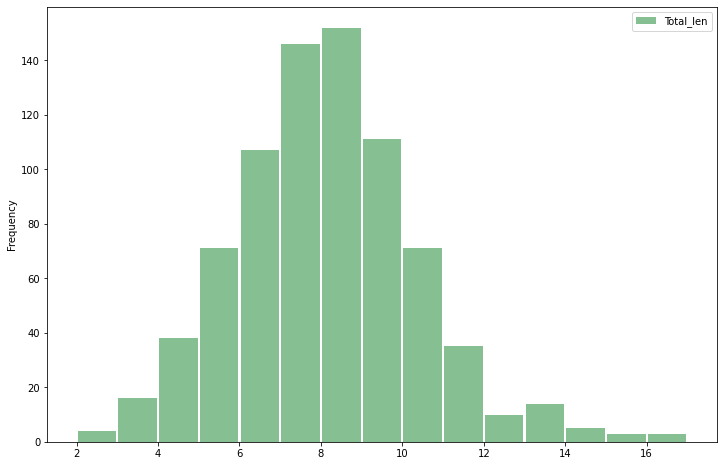

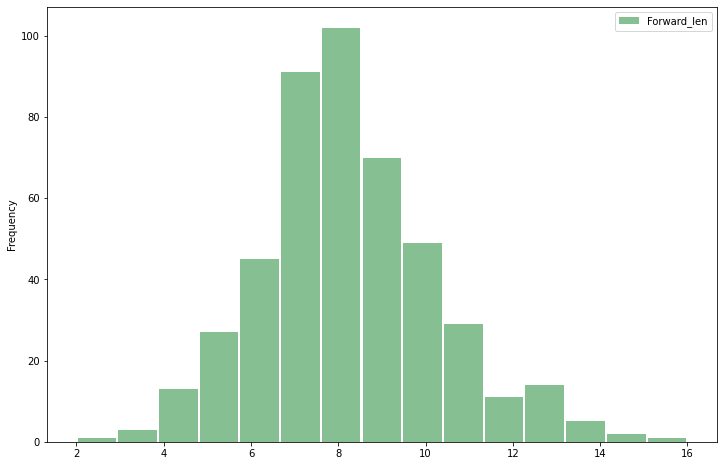

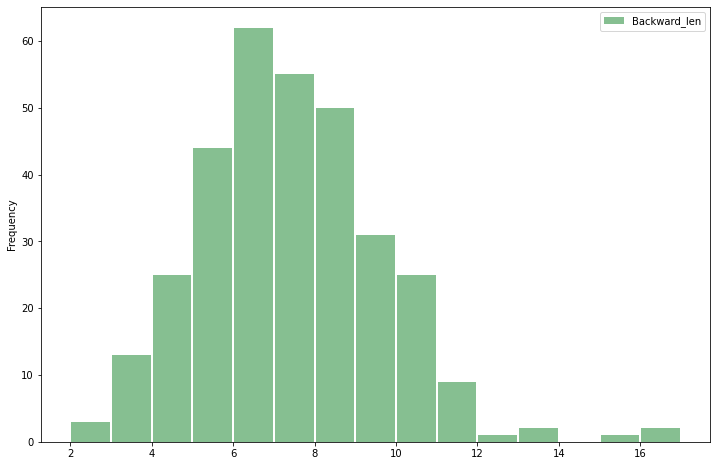

In [135]:
def stat(df):
    FW_NUM, BW_NUM, Clean_NUM = 0,0,0
    flawed_vid = 0
    whole_vid = 0
    FW_len_list=[]
    BW_len_list=[]
    for index, row in df.iterrows():
        # make sure column name is corrects(without extra space)
        vid_path = row.get("Video_Path")
        FW_Start, FW_End = row.get("FW_Start"), row.get("FW_End")
        BW_Start, BW_End = row.get("BW_Start"), row.get("BW_End")
        vid_path = vid_path.replace('"','')
        video_condition = row.get("Video Condition")
        length = row.get("Halfway or Wholeway")

        #check if the label is correct
        if not pd.isnull(FW_Start) and not pd.isnull(FW_End):
            FW_NUM+=1
            FW_len_list.append(FW_End-FW_Start)
        if not pd.isnull(BW_Start) and not pd.isnull(BW_End):
            BW_NUM+=1
            BW_len_list.append(BW_End-BW_Start)
        if length == "Whole" and  pd.isnull(video_condition):
            Clean_NUM+=1
        if length == "Whole":
            whole_vid+=1
        if not pd.isnull(video_condition) and length == "Whole":
            flawed_vid+=1

    Total_NUM = FW_NUM + BW_NUM
    Total_len_list = FW_len_list + BW_len_list
    len_df = pd.DataFrame(Total_len_list, columns=['Total_len'])
    FW_df = pd.DataFrame(FW_len_list, columns=["Forward_len"])
    BW_df = pd.DataFrame(BW_len_list, columns=["Backward_len"])
    ax1 = len_df.plot.hist(bins=15,figsize=(12, 8),color='#86bf91',rwidth=0.95)
    ax2 = FW_df.plot.hist(bins=15,figsize=(12, 8),color='#86bf91',rwidth=0.95)
    ax3 = BW_df.plot.hist(bins=15,figsize=(12, 8),color='#86bf91',rwidth=0.95)

    print("Total Gait Num:{0}\nForward Gait Num:{1}\nBackward Gait Num:{2}\nPaired Walk NUM:{3}\nClean Paired Walk NUM:{4}\nFlawed Paired Walk NUM:{5}".format(Total_NUM, FW_NUM, BW_NUM, whole_vid*2, Clean_NUM*2, flawed_vid*2))
    # print(df["Halfway or Wholeway"].value_counts())
    print(df["Video Condition"].value_counts())
        

stat(df)

In [124]:
import seaborn as sns
import matplotlib.pyplot as plt
# %matplotlib inline


C:\Users\jingy\anaconda3\envs\simhrnet\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0, 0.5, 'Number')

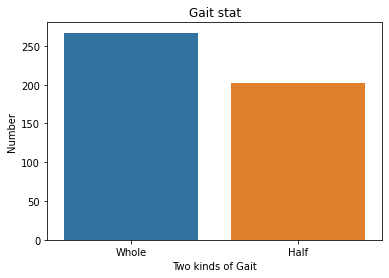

In [125]:
count,ax = plt.subplots()
ax = sns.countplot('Halfway or Wholeway', data=df)
ax.set_title('Gait stat')
ax.set_xlabel('Two kinds of Gait')
ax.set_ylabel('Number')
